In [1]:
# Librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 1.- Carga la base de datos de películas que tiene información sobre películas, incluyendo el título(title), género (category ) y duración en minutos(length).

In [2]:
peliculas = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/peliculas.csv')
peliculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             1000 non-null   object 
 1   description       1000 non-null   object 
 2   release_year      1000 non-null   int64  
 3   rental_rate       1000 non-null   float64
 4   length            1000 non-null   int64  
 5   rating            1000 non-null   object 
 6   special_features  1000 non-null   object 
 7   category          997 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB


In [3]:
# 1 - A) Cuantas peliculas cuantos generos y cuanto dura en promedio las peliculas


numPeliculas = peliculas['title'].count()
generos = peliculas['category'].value_counts().count()
avglength = peliculas['length'].mean()

print(f'El numero de peiculas es: {numPeliculas} \nEl numero de categorias es: {generos} \nCon una duracion promedio de: {avglength} minutos')

El numero de peiculas es: 1000 
El numero de categorias es: 16 
Con una duracion promedio de: 115.272 minutos


In [4]:
# 1 - B) crea un dataframe llamado películas_dormir con las películas que tienen una duración superior a 2 horas y sean documentales

peliculas_dormir = peliculas[peliculas['length']>120].query('category == "Documentary"')

peliculas_dormir

,title,description,release_year,rental_rate,length,rating,special_features,category
39,Army Flintstones,A Boring Saga of a Database Administrator And ...,2006,0.99,148,R,"Trailers,Commentaries",Documentary
57,Beach Heartbreakers,A Fateful Display of a Womanizer And a Mad Sci...,2006,2.99,122,G,"Deleted Scenes,Behind the Scenes",Documentary
128,Cause Date,A Taut Tale of a Explorer And a Pastry Chef wh...,2006,2.99,179,R,"Commentaries,Deleted Scenes,Behind the Scenes",Documentary
141,Chicken Hellfighters,A Emotional Drama of a Dog And a Explorer who ...,2006,0.99,122,PG,"Trailers,Commentaries,Deleted Scenes,Behind th...",Documentary
155,Clerks Angels,A Thrilling Display of a Sumo Wrestler And a G...,2006,4.99,164,G,Commentaries,Documentary
205,Dancing Fever,A Stunning Story of a Explorer And a Forensic ...,2006,0.99,144,G,"Commentaries,Behind the Scenes",Documentary
247,Dozen Lion,A Taut Drama of a Cat And a Girl who must Defe...,2006,4.99,177,NC-17,"Commentaries,Deleted Scenes,Behind the Scenes",Documentary
260,Duffel Apocalypse,A Emotional Display of a Boat And a Explorer w...,2006,0.99,171,G,Commentaries,Documentary
440,Hunter Alter,A Emotional Drama of a Mad Cow And a Boat who ...,2006,2.99,125,PG-13,"Commentaries,Deleted Scenes,Behind the Scenes",Documentary
456,Independence Hotel,A Thrilling Tale of a Technical Writer And a B...,2006,0.99,157,NC-17,"Trailers,Behind the Scenes",Documentary


In [5]:
# 1- C) Contar cuántas películas de cada género existen

print(peliculas.groupby('category').count()['title'], '\n\ny 3 peliculas sin Categoria')

# y 3 peliculas sin categoria

category
Action         64
Animation      66
Children       60
Classics       57
Comedy         58
Documentary    68
Drama          61
Family         69
Foreign        73
Games          61
Horror         56
Music          51
New            63
Sci-Fi         61
Sports         73
Travel         56
Name: title, dtype: int64 

y 3 peliculas sin Categoria


In [6]:
# 1 - D) Calcular la duración promedio de las películas de cada género

peliculas.groupby('category')['length'].mean().round(2)

category
Action         111.61
Animation      111.02
Children       109.80
Classics       111.67
Comedy         115.83
Documentary    108.75
Drama          119.89
Family         114.78
Foreign        121.70
Games          127.84
Horror         112.48
Music          113.65
New            111.13
Sci-Fi         108.20
Sports         127.51
Travel         113.38
Name: length, dtype: float64

In [7]:
# 1 - E) Crear una nueva columna que indique si una película es 
# "Corta" (duración menor a 1.5 horas), "Normal" (entre 1.5 y 2.5 horas) o "Larga" (mayor a 2.5 horas)

peliculas['Duracion'] = np.where(peliculas['length'] < 90, 'Corta', np.where(peliculas['length'] < 150, 'Normal', 'Larga'))

peliculas[['title', 'length', 'Duracion']]

,title,length,Duracion
0,Academy Dinosaur,86,Corta
1,Ace Goldfinger,48,Corta
2,Adaptation Holes,50,Corta
3,Affair Prejudice,117,Normal
4,African Egg,130,Normal
...,...,...,...
995,Young Language,183,Larga
996,Youth Kick,179,Larga
997,Zhivago Core,105,Normal
998,Zoolander Fiction,101,Normal


### 2.- Sabemos que en el caso de México, esta formado por estados, y cada estado esta formado por municipios. La base de datos población_Asgard contiene los datos de un país llamado Asgard, formado por estados y estos a su vez por municipios. Para cada municipio se reporta su población.

In [8]:
poblacion = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/poblacion_Asgard.csv')


In [9]:
# 2 - A) Ordena la base alfabéticamente por estado y por municipio

poblacion = poblacion.sort_values(['Estado', 'Municipio'])
poblacion

,País,Estado,Municipio,Población
16,Asgard,Alderaan,Ciudad Jedi,130312
1,Asgard,Alderaan,Fuente Dorada,49984
31,Asgard,Alderaan,Luz azul,914910
76,Asgard,Alderaan,Madero,774290
46,Asgard,Alderaan,San Isidro,159338
...,...,...,...,...
8,Asgard,Yaven,El Bosque,649663
83,Asgard,Yaven,Green Flag,380989
68,Asgard,Yaven,Santa María,111687
53,Asgard,Yaven,Villa Wendy,646914


In [10]:
# 2 - B) Cuantos estados hay, cuantos municipios hay en cada estado y cuantos municipios hay en total.


numEstados = len(poblacion.groupby('Estado').count())

numMunicipioxEstado = pd.DataFrame(poblacion.groupby('Estado')['Municipio'].count())

numMunicipio = poblacion['Municipio'].count()



print(f'[1] Hay {numEstados} estados. \n\n[2] Hay 6 municipios por estados.\n    lista: \n{numMunicipioxEstado} \n\n[3] Y hay {numMunicipio} de municipios.')


[1] Hay 15 estados. 

[2] Hay 6 municipios por estados.
    lista: 
           Municipio
Estado              
Alderaan           6
Atlantis           6
Endor              6
Genosha            6
Gotham             6
Mandalore          6
Mordor             6
Mustafar           6
Naboo              6
Narnia             6
Pandora            6
Sokovia            6
Tatooine           6
Wakanda            6
Yaven              6 

[3] Y hay 90 de municipios.


In [11]:
# 2 - C) Cuanta población tiene el país en total y cuanta población tiene cada estado

numPoblacion = poblacion['Población'].sum()

numPoblacionxEstado = pd.DataFrame(poblacion.groupby('Estado')['Población'].sum())

print(f'El país tiene una poblacoin de : {numPoblacion} \n\nLista de Poblacion por Estado: \n\n{numPoblacionxEstado}')


El país tiene una poblacoin de : 43114719 

Lista de Poblacion por Estado: 

           Población
Estado              
Alderaan     2283452
Atlantis     3779656
Endor        2427956
Genosha      2871584
Gotham       3204304
Mandalore    2044164
Mordor       3627119
Mustafar     2183880
Naboo        1602111
Narnia       2961407
Pandora      2959272
Sokovia      4722224
Tatooine     2770055
Wakanda      2905562
Yaven        2771973


In [17]:
# 2 - D) Calcula la mediana de la población de los municipios, y clasifícalos, aquellos por
#       arriba de la mediana deben llamarse “muy poblados” y aquellos debajo de la mediana “poco poblados”

mediana = poblacion['Población'].median()

poblacion['Clasificación'] = np.where(poblacion['Población'] > mediana, 'muy poblados', 'poco poblados')

poblacion

,País,Estado,Municipio,Población,Clasificación
16,Asgard,Alderaan,Ciudad Jedi,130312,poco poblados
1,Asgard,Alderaan,Fuente Dorada,49984,poco poblados
31,Asgard,Alderaan,Luz azul,914910,muy poblados
76,Asgard,Alderaan,Madero,774290,muy poblados
46,Asgard,Alderaan,San Isidro,159338,poco poblados
...,...,...,...,...,...
8,Asgard,Yaven,El Bosque,649663,muy poblados
83,Asgard,Yaven,Green Flag,380989,poco poblados
68,Asgard,Yaven,Santa María,111687,poco poblados
53,Asgard,Yaven,Villa Wendy,646914,muy poblados


In [13]:
# 2 - E) Encuentra los 5 municipios mas poblados y los cinco municipios menos poblados del país

municipioMenosPoblado = poblacion.sort_values('Población')[['Municipio', 'Población']].head(5)
municipioMasPoblado = poblacion.sort_values('Población')[['Municipio', 'Población']].tail(5)

print(f'Los 5 municipios mas poblados son: \n{municipioMasPoblado}\n\nLos 5 municipios menos poblados son: \n{municipioMenosPoblado}')

Los 5 municipios mas poblados son: 
        Municipio  Población
79    Yellow town     974324
74  Gral Escobedo     974548
6        La Unión     986067
27    Villa Norte     997107
34       Madripur     998079

Los 5 municipios menos poblados son: 
      Municipio  Población
17  Ciudad Jedi      13666
14     Luz roja      14986
39   Villa rosa      25538
26  Shelbyville      31535
85  Mar violeta      44585


In [14]:
# 2 - F) El municipio más poblado de cada estado

poblacion.groupby('Estado')['Población'].idxmax()
municipioMasPobladoxEstado = poblacion.loc[poblacion.groupby('Estado')['Población'].idxmax()][['Estado', 'Municipio', 'Población']]

print(f'Municipio mas poblado de cada Estado:\n\n{municipioMasPobladoxEstado}')

Municipio mas poblado de cada Estado:

       Estado         Municipio  Población
31   Alderaan          Luz azul     914910
88   Atlantis      Mar amarillo     961061
69      Endor       Santa María     875371
32    Genosha   Villa Lannister     822654
55     Gotham       Playa Verde     918710
71  Mandalore         San Pedro     736716
34     Mordor          Madripur     998079
27   Mustafar       Villa Norte     997107
33      Naboo          Luz azul     602661
74     Narnia     Gral Escobedo     974548
60    Pandora  Villa Demogorgon     969140
6     Sokovia          La Unión     986067
50   Tatooine      Villa Marlon     925414
82    Wakanda          Redgreen     880858
23      Yaven          Amanecer     708611


### 3.- Genera un grafico de barras de:

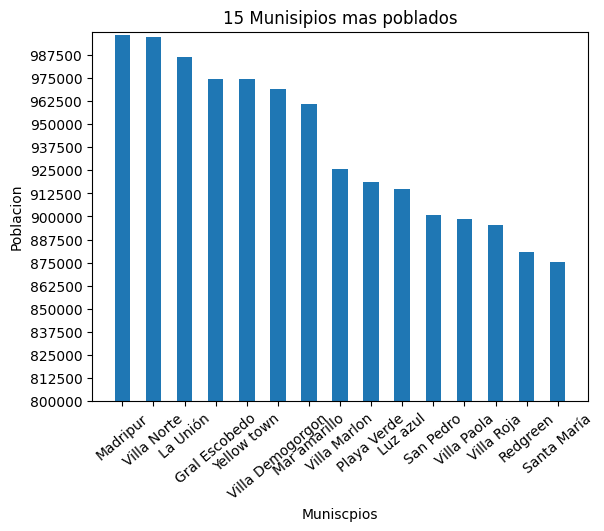

In [20]:
# 3 - A) Los 15 municipios más poblados de Asgard

municipioMasPoblado15 = poblacion.sort_values('Población', ascending=0)[['Municipio', 'Población']].head(15)
x = municipioMasPoblado15['Municipio']
y = municipioMasPoblado15['Población']

plt.bar(x,y, width = 0.5)
plt.title('15 Munisipios mas poblados')
plt.xlabel('Muniscpios')
plt.xticks(rotation=40)
plt.ylabel('Poblacion')
plt.yticks(list(range(700000, 1000000,12500)))
plt.ylim(800000, 1000000)

plt.show()


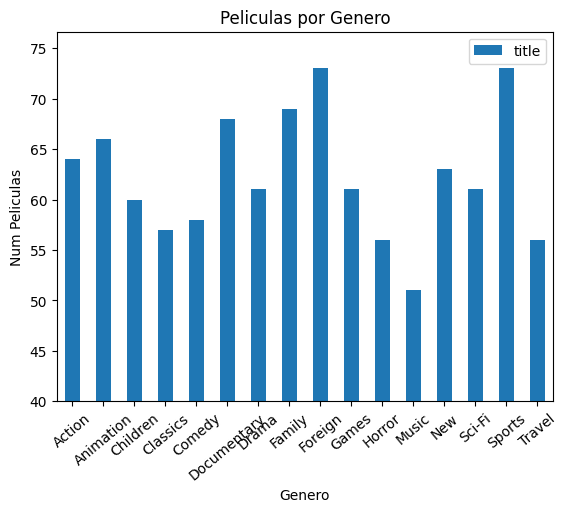

In [19]:
# 3 - B) Cuantas peliculas hay de cada género

(pd.DataFrame(peliculas.groupby('category').count()['title'])).plot.bar()
plt.title('Peliculas por Genero')
plt.xlabel('Genero')
plt.xticks(rotation=40)
plt.ylabel('Num Peliculas')
plt.ylim(40)

plt.show()

